# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './data/traffic-signs-data/train.p'
testing_file = './data/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
is_features_normal = False
is_validation_data = False
is_additional_data = False

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import random
import numpy as np

### Display one random traffic sign from each class

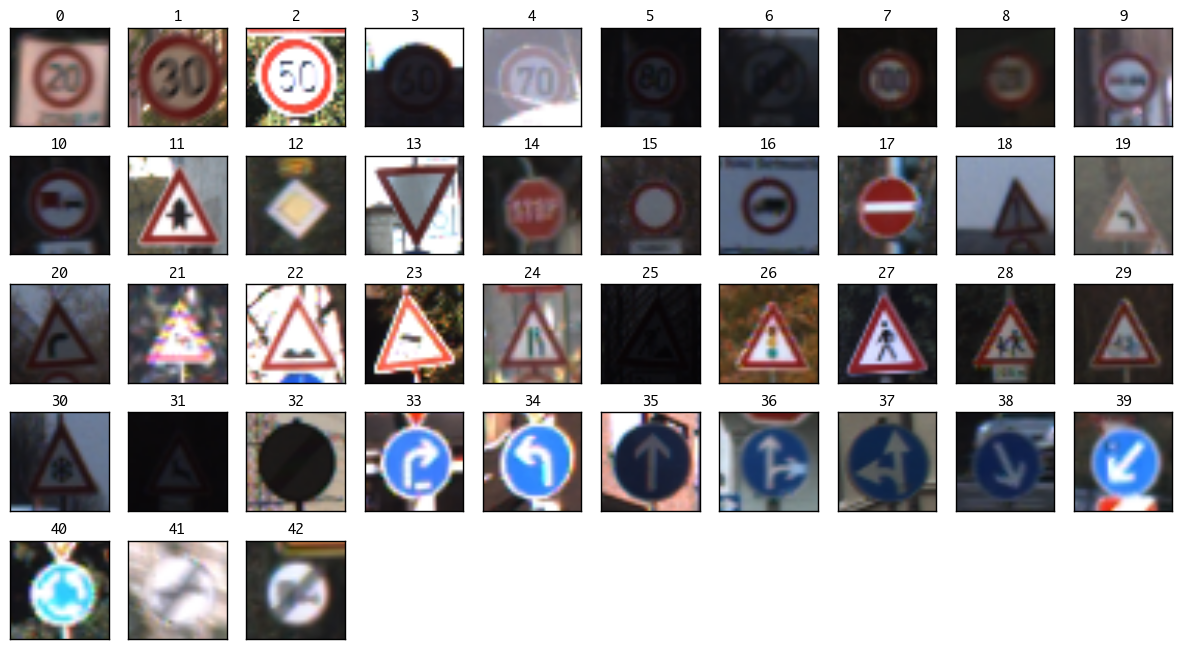

In [4]:
n_cols = 10
n_rows = int(np.ceil(n_classes / n_cols))
f, axarr = plt.subplots(n_rows, n_cols, figsize=(15,8))
for i in range(int(n_rows * n_cols)):
    ax = axarr[i // n_cols][i % n_cols]
    if i < n_classes:
        index = random.choice(np.where(y_train == i)[0])  #pick random item from class i
        image = X_train[index].squeeze()
        ax.imshow(image)
        ax.set_title(str(i))
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
    else:
        ax.axis('off')

### Display first 4 traffic signs from each class

As you may find below, exactly same traffic sign is used as different items in the dataset. This is because the some traffic signs are collected from video with different time frame. So we need to be careful when split training data to training and validation set. If we randomly choose training and validation set, we will obtain unexpectedly high validation set accuracy opposed to low test set accuracy.

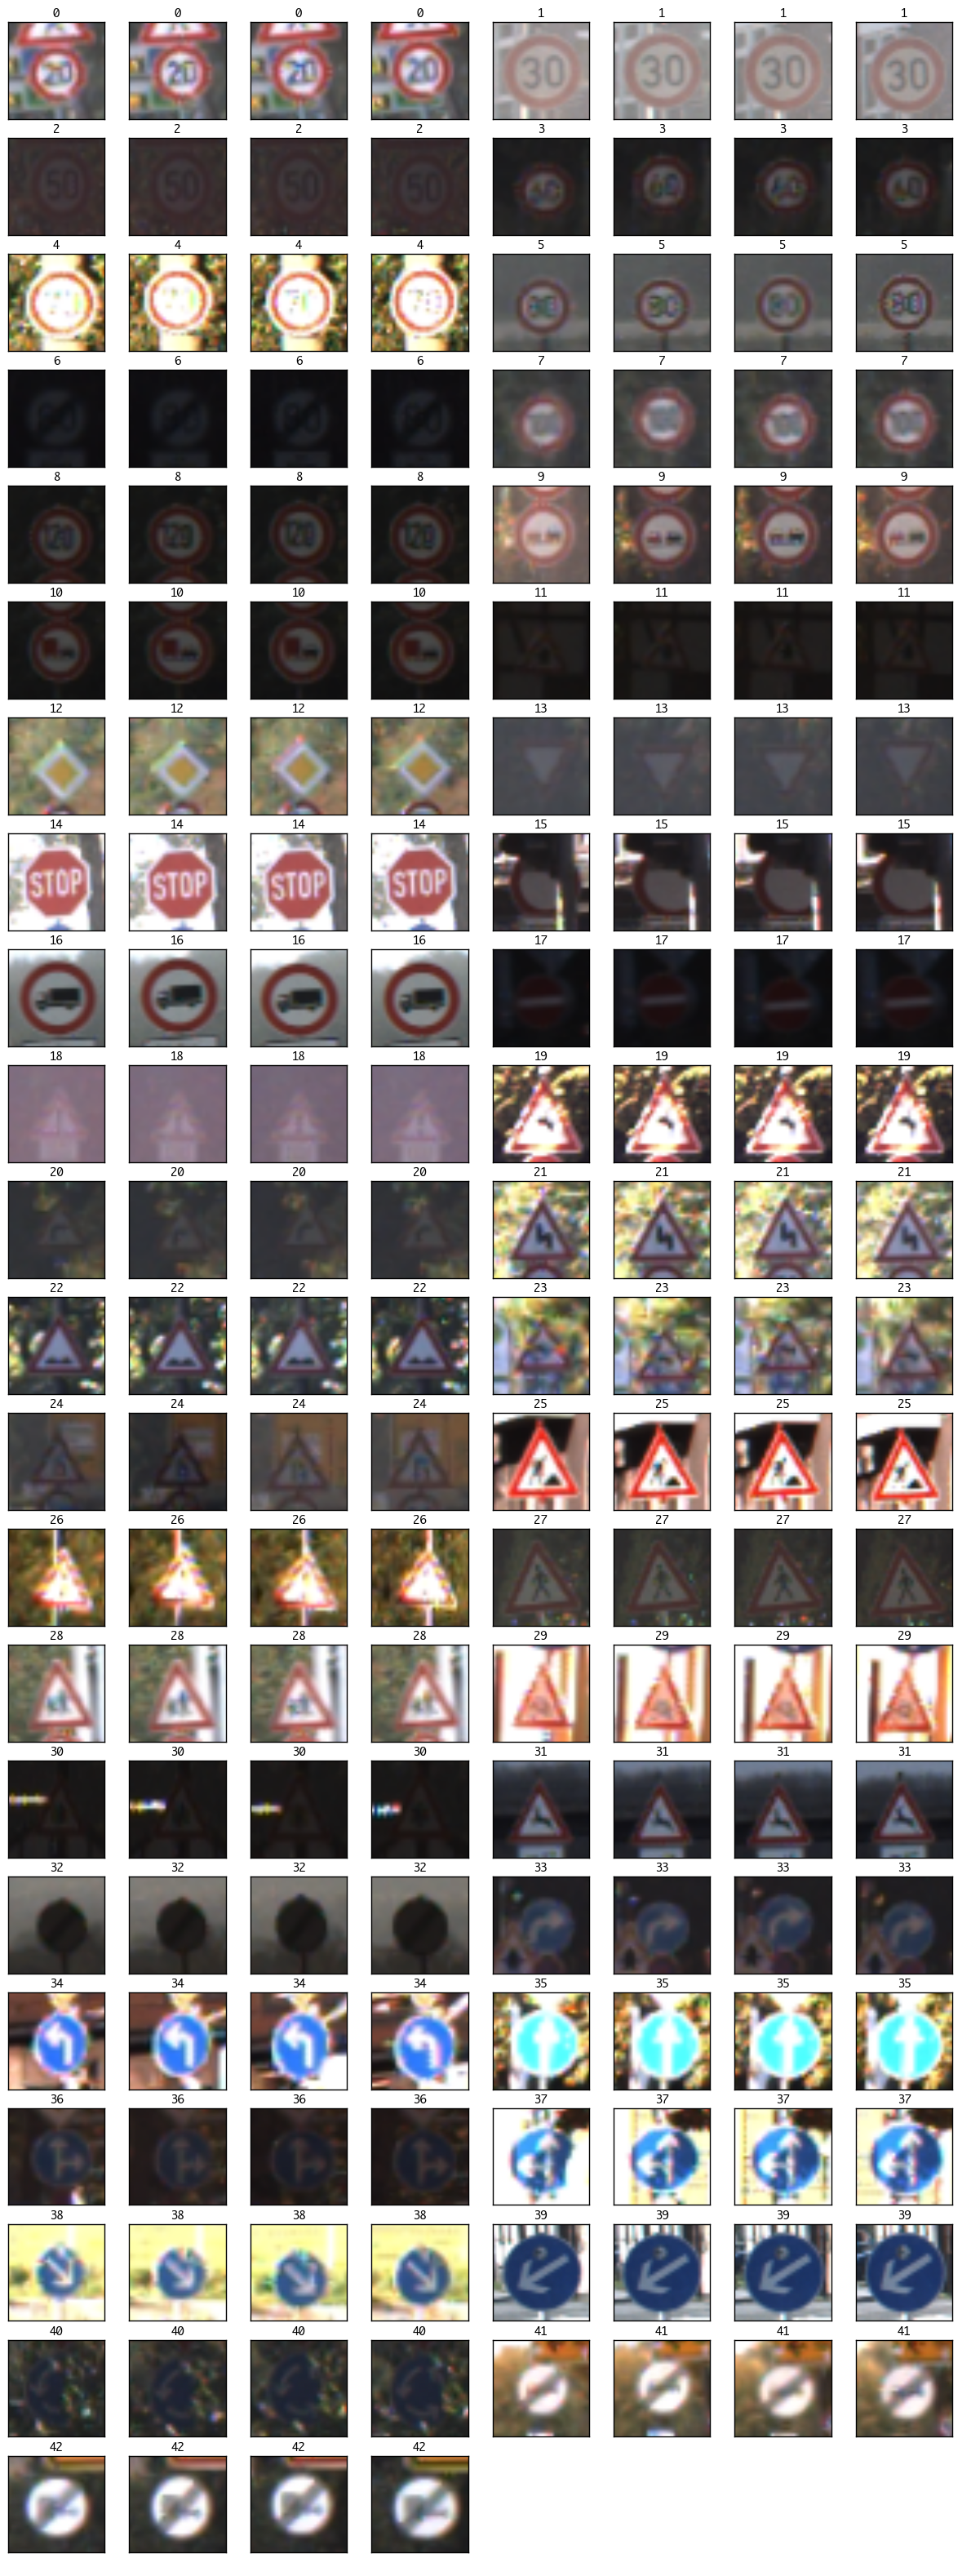

In [5]:
n_cols = 8
n_same_items = 4
n_rows = int(np.ceil(n_same_items * n_classes / n_cols))
f, axarr = plt.subplots(n_rows, n_cols, figsize=(15,40))
for i in range(int(n_rows * n_cols / n_same_items)):
    offset = i * n_same_items
    for j in range(n_same_items):
        ax = axarr[(offset+j) // n_cols][(offset+j) % n_cols]
        if i < n_classes:
                #index = random.choice(np.where(y_train == i)[0])  #pick random item from class i
                index = np.where(y_train == i)[0][j]  #pick j-th item in class i
                image = X_train[index].squeeze()
                ax.imshow(image)
                ax.set_title(str(i))
                ax.axes.get_xaxis().set_visible(False)
                ax.axes.get_yaxis().set_visible(False)
        else:
            ax.axis('off')

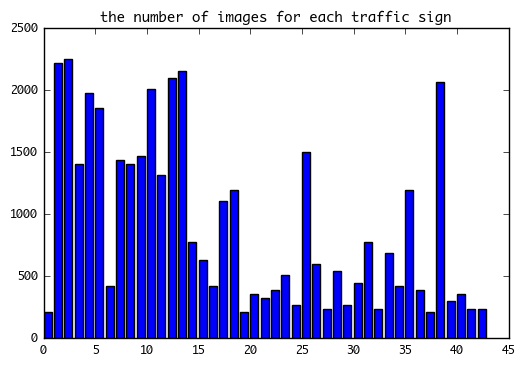

In [7]:
signs, n_signs = np.unique(y_train, return_counts=True)
plt.bar(signs, n_signs)
plt.title("the number of images for each traffic sign")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [453]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [8]:
# Split training datasets for training and validation in order to minimize the mixture of traning and validation data
if not is_validation_data:
    train_indeces = np.array([]).astype('uint8')
    valid_indeces = np.array([]).astype('uint8')
    for i in range(n_classes):
        indeces = np.where(y_train == i)[0] # select indeces belong to class i
        index_thres = int(len(indeces) * 0.95) # choose 95% as threshold
        train_indeces = np.concatenate([train_indeces, indeces[:index_thres]]) # first 95% in eath class as training
        valid_indeces = np.concatenate([valid_indeces, indeces[index_thres:]]) # last 5% as validaiton
    X_train, X_validation = X_train[train_indeces], X_train[valid_indeces]
    y_train, y_validation = y_train[train_indeces], y_train[valid_indeces]
    is_validation_data = True
len(X_train), len(X_validation), len(X_test)

(37239, 1970, 12630)

In [11]:
def clipped_zoom(img, zoom_factor, **kwargs):
    # source http://stackoverflow.com/questions/37119071/scipy-rotate-and-zoom-an-image-without-changing-its-dimensions
    from scipy.ndimage import zoom
    h, w = img.shape[:2]

    # width and height of the zoomed image
    zh = int(np.round(zoom_factor * h))
    zw = int(np.round(zoom_factor * w))

    # for multichannel images we don't want to apply the zoom factor to the RGB
    # dimension, so instead we create a tuple of zoom factors, one per array
    # dimension, with 1's for any trailing dimensions after the width and height.
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

    # zooming out
    if zoom_factor < 1:
        # bounding box of the clip region within the output array
        top = (h - zh) // 2
        left = (w - zw) // 2
        # zero-padding
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = zoom(img, zoom_tuple, **kwargs)

    # zooming in
    elif zoom_factor > 1:
        # bounding box of the clip region within the input array
        top = (zh - h) // 2
        left = (zw - w) // 2
        out = zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)
        # `out` might still be slightly larger than `img` due to rounding, so
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]

    # if zoom_factor == 1, just return the input array
    else:
        out = img
    return out

In [17]:
from scipy.ndimage import shift
from scipy.ndimage import rotate

# perturb image to genarate additional data
def perturb_image(img, delta_pixel_range=(-2,2), scale_ratio_range=(0.9,1.1), rotation_range=(-15,15)):
    # translation
    dx = random.randint(*delta_pixel_range)
    dy = random.randint(*delta_pixel_range)
    shifted_img = shift(img, (dx,dy,0))

    # scaling
    dscale = random.uniform(*scale_ratio_range)
    zoomed_img = clipped_zoom(shifted_img, dscale)
    
    # rotation
    dangle = random.uniform(*rotation_range)
    res = rotate(zoomed_img, dangle, reshape=False)
    return res

/Users/riei.ishizeki/anaconda/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


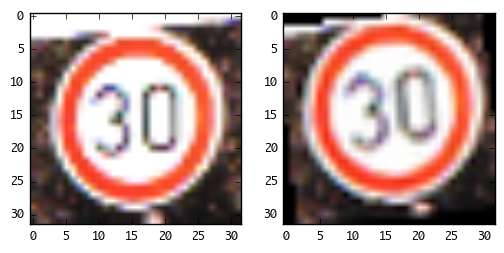

In [32]:
image1 = X_train[400].squeeze()
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image1)
ax[1].imshow(perturb_image(image1))

In [33]:
# Split training datasets for training and validation in order to minimize the mixture of traning and validation data
if not is_additional_data:
    n_new_data_for_each_image = 4
    X_train_new = []
    y_train_new = []
    for index in range(len(X_train)):
        # original data
        X_train_new.append(X_train[index])
        y_train_new.append(y_train[index])
        # additional data
        for i in range(n_new_data_for_each_image):
            X_train_new.append(perturb_image(X_train[index]))
            y_train_new.append(y_train[index])
    X_train = np.array(X_train_new)
    y_train = np.array(y_train_new) 
    del X_train_new; del y_train_new
    is_additional_data = True
    
len(X_train)

/Users/riei.ishizeki/anaconda/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


186195

In [34]:
X_train.shape, y_train.shape

((186195, 32, 32, 3), (186195,))

In [35]:
X_train.dtype, y_train.dtype, X_validation.dtype, y_validation.dtype, X_test.dtype, y_test.dtype

(dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'))

In [36]:
# Save the data for easy access
# we'll save the data before normalization to save space (after normalization dtype for X will be float32 from uint8)
import os
pickle_file = 'data/traffic-signs-data_train_validation_2.pickle'
if not os.path.isfile(pickle_file):
    print('Saving data to pickle file...')
    try:
        with open(pickle_file, 'wb') as pfile:
            pickle.dump(
                {
                    'X_train': X_train,
                    'y_train': y_train,
                    'X_validation': X_validation,
                    'y_validation': y_validation,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

Saving data to pickle file...
Data cached in pickle file.


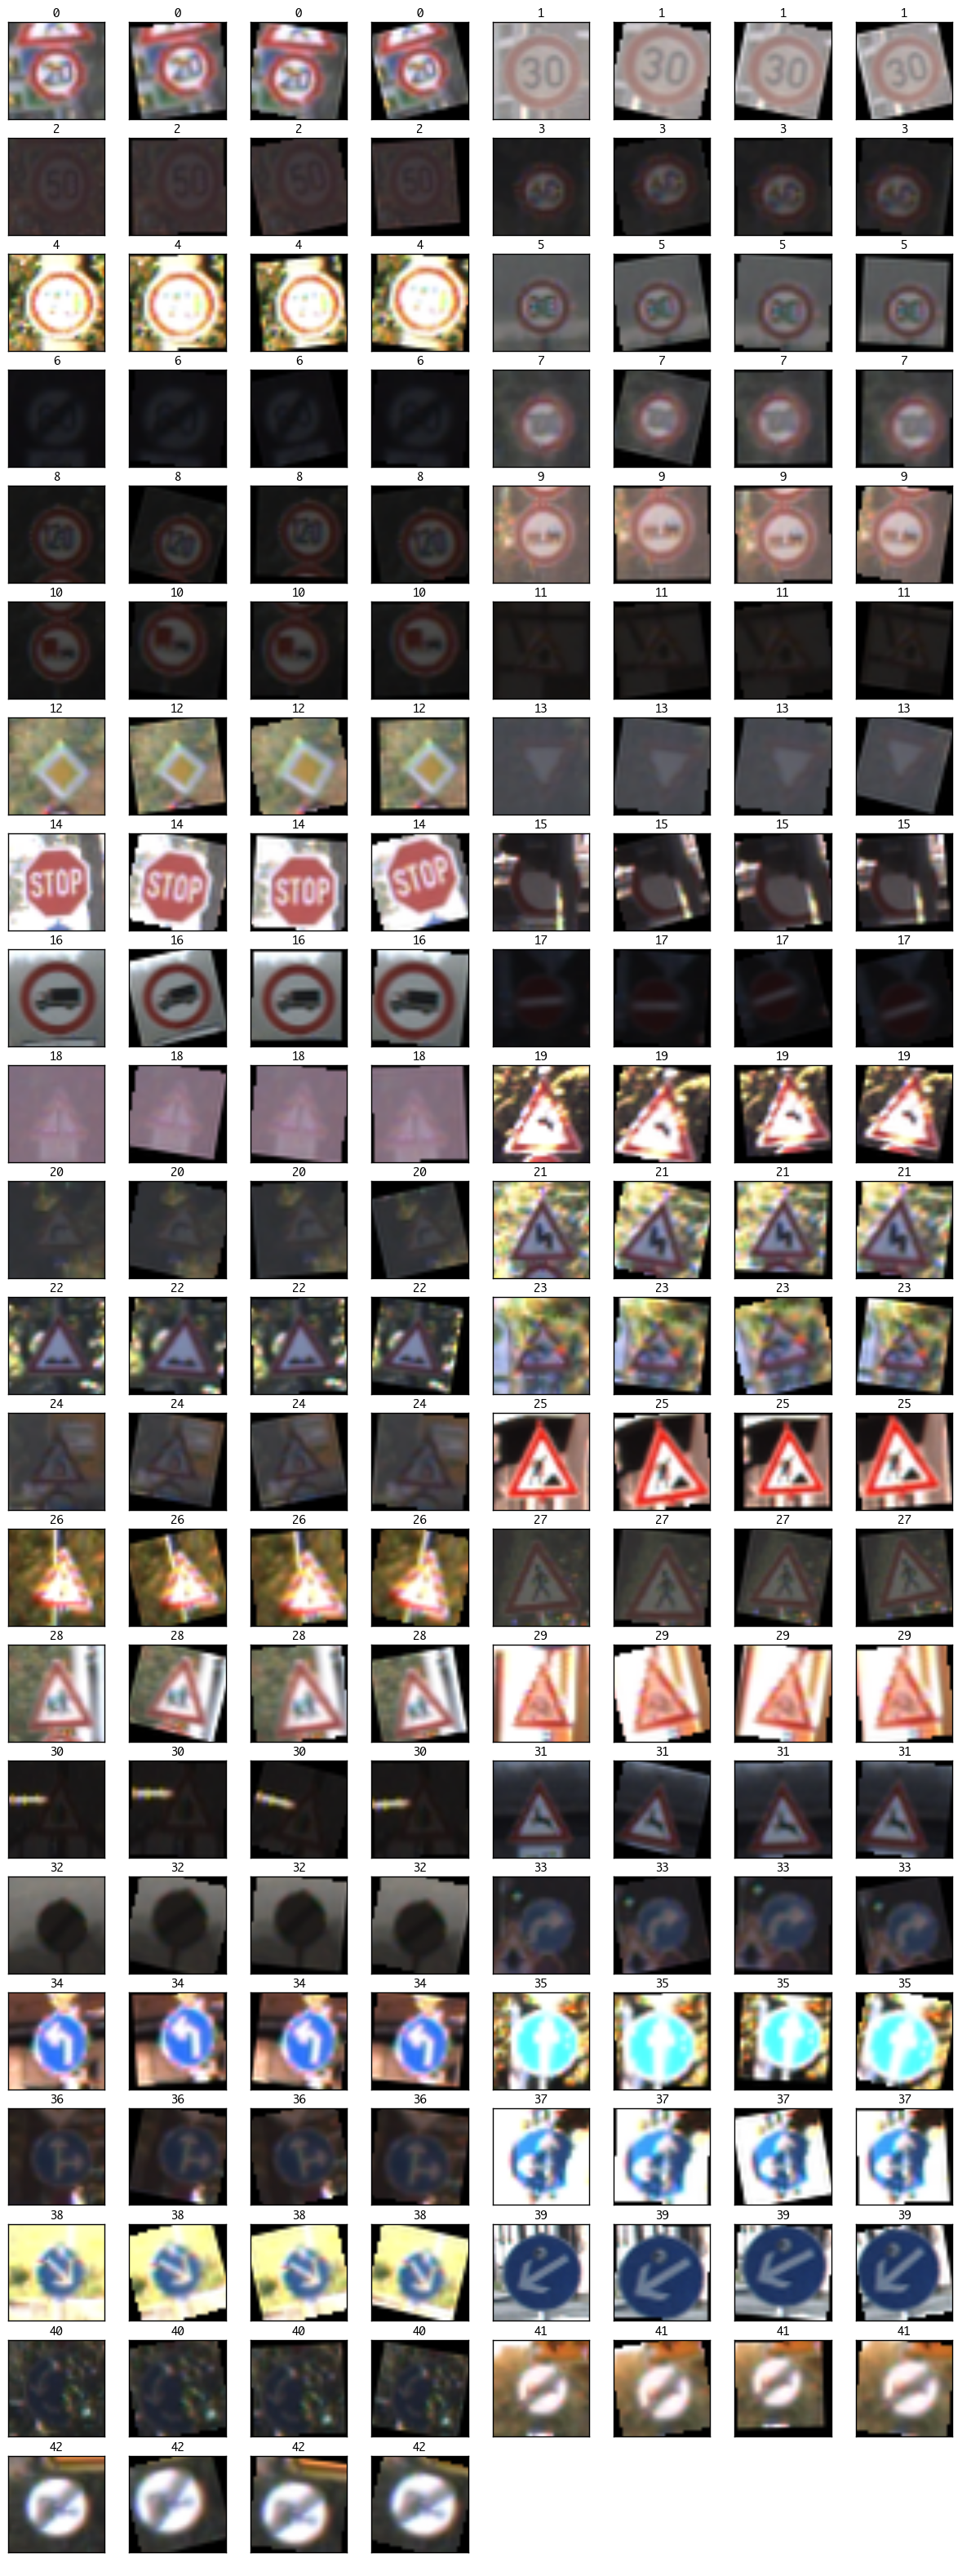

In [39]:
n_cols = 8
n_same_items = 4
n_rows = int(np.ceil(n_same_items * n_classes / n_cols))
f, axarr = plt.subplots(n_rows, n_cols, figsize=(15,40))
for i in range(int(n_rows * n_cols / n_same_items)):
    offset = i * n_same_items
    for j in range(n_same_items):
        ax = axarr[(offset+j) // n_cols][(offset+j) % n_cols]
        if i < n_classes:
                #index = random.choice(np.where(y_train == i)[0])  #pick random item from class i
                index = np.where(y_train == i)[0][j]  #pick j-th item in class i
                image = X_train[index].squeeze()
                ax.imshow(image)
                ax.set_title(str(i))
                ax.axes.get_xaxis().set_visible(False)
                ax.axes.get_yaxis().set_visible(False)
        else:
            ax.axis('off')

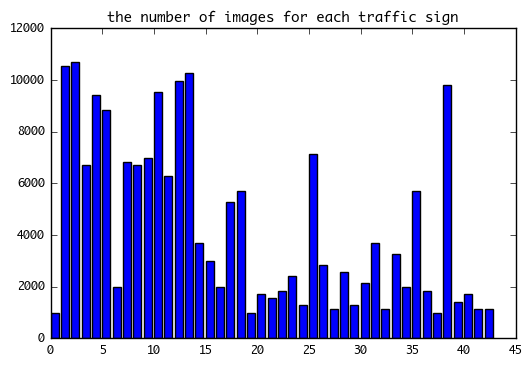

In [40]:
signs, n_signs = np.unique(y_train, return_counts=True)
plt.bar(signs, n_signs)
plt.title("the number of images for each traffic sign")

## Checkpoint

We can start from here, once new training and validation data are generated and saved.

In [4]:
# Load pickled data
import pickle

training_validation_file = './data/traffic-signs-data_train_validation_2.pickle'
testing_file = './data/traffic-signs-data/test.p'

with open(training_validation_file, mode='rb') as f:
    train_validation = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train_validation['X_train'], train_validation['y_train']
X_validation, y_validation = train_validation['X_validation'], train_validation['y_validation']
X_test, y_test = test['features'], test['labels']
del train_validation
is_features_normal = False
is_validation_data = True
is_additional_data = True

In [5]:
def normalize_image(image_data, dtype='float32'):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # TODO: Implement Min-Max scaling for  image data
    a = 0.1; b = 0.9
    X_min = 0; X_max = 255
    res = a + (image_data - X_min) * (b - a) / (X_max - X_min)
    return res.astype(dtype)

In [6]:
if not is_features_normal:
    X_train = normalize_image(X_train)
    X_validation = normalize_image(X_validation)
    X_test = normalize_image(X_test)
    is_features_normal = True

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [8]:
import tensorflow as tf
import math
from tqdm import tqdm
from sklearn.utils import shuffle

In [9]:
### Implement LeNet-5
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    #from IPython.core.debugger import Tracer; Tracer()()

    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal([5, 5, 3, 6], mean=mu, stddev=sigma))
    b1 = tf.Variable(tf.zeros(6))
    layer1 = tf.nn.bias_add(tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID'), b1)

    # Activation.
    layer1 = tf.nn.relu(layer1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    layer1 = tf.nn.max_pool(layer1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean=mu, stddev=sigma))
    b2 = tf.Variable(tf.zeros(16))
    layer2 = tf.nn.bias_add(tf.nn.conv2d(layer1, W2, strides=[1, 1, 1, 1], padding='VALID'),
                                             b2)
    
    # Activation.
    layer2 = tf.nn.relu(layer2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    layer2 = tf.nn.max_pool(layer2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Flatten. Input = 5x5x16. Output = 400.
    layer2 = flatten(layer2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    W3 = tf.Variable(tf.truncated_normal([400, 120], mean=mu, stddev=sigma))
    b3 = tf.Variable(tf.zeros(120))
    layer3 = tf.add(tf.matmul(layer2, W3), b3)
    
    # Activation.
    layer3 = tf.nn.relu(layer3)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    W4 = tf.Variable(tf.truncated_normal([120, 84], mean=mu, stddev=sigma))
    b4 = tf.Variable(tf.zeros(84))
    layer4 = tf.add(tf.matmul(layer3, W4), b4)
    
    # Activation.
    layer4 = tf.nn.relu(layer4)

    # Layer 5: Fully Connected. Input = 84. Output = n_classes.
    W5 = tf.Variable(tf.truncated_normal([84, n_classes], mean=mu, stddev=sigma))
    b5 = tf.Variable(tf.zeros(n_classes))
    logits = tf.add(tf.matmul(layer4, W5), b5)    

    return logits

In [10]:
tf.reset_default_graph()

In [11]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [12]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [13]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [14]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [15]:
EPOCHS = 60
BATCH_SIZE = 64

In [16]:
len(X_train)

186195

In [17]:
# Measurements use for graphing loss and accuracy
log_epoch_step = 2
epochs = []
loss_epoch = []
train_acc_epoch = []
valid_acc_epoch = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    batch_count = int(math.ceil(num_examples / BATCH_SIZE))
    l = float('inf')
    training_accuracy = 0
    validation_accuracy = 0
    
    for i in range(EPOCHS):
        X_train, y_train= shuffle(X_train, y_train)
        # Progress bar
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(i+1, EPOCHS), unit='batches')
        
        for batch_i in batches_pbar:
            offset = batch_i * BATCH_SIZE
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            _, l = sess.run([training_operation, loss_operation], feed_dict={x: batch_x, y: batch_y})
            
        # Log every log_epoch_step batches
        if not i % log_epoch_step:
            # Calculate Training and Validation accuracy
            training_accuracy = evaluate(X_train, y_train)
            validation_accuracy = evaluate(X_validation, y_validation)

            # Log epochs
            previous_epoch = epochs[-1] if epochs else 0
            epochs.append(log_epoch_step + previous_epoch)
            loss_epoch.append(l)
            train_acc_epoch.append(training_accuracy)
            valid_acc_epoch.append(validation_accuracy)

            print("EPOCH {} ...".format(i+1), flush=True)
            #print("Loss = {:.3f}".format(l), flush=True)
            print("Training Accuracy = {:.3f}".format(training_accuracy), flush=True)
            print("Validation Accuracy = {:.3f}".format(validation_accuracy), flush=True)
            saver.save(sess, 'lenet', global_step=(i+1))
            print("Model saved", flush=True)        

    training_accuracy = evaluate(X_train, y_train)
    validation_accuracy = evaluate(X_validation, y_validation)
    print("Training Accuracy = {:.3f}".format(training_accuracy))
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    saver.save(sess, 'lenet')
    print("Model saved")

Epoch  1/60: 100%|██████████| 2910/2910 [03:17<00:00, 14.75batches/s]:   0%|          | 1/2910 [00:00<05:19,  9.11batches/s]


EPOCH 1 ...
Training Accuracy = 0.877
Validation Accuracy = 0.932
Model saved


Epoch  3/60: 100%|██████████| 2910/2910 [02:45<00:00, 17.64batches/s]


EPOCH 3 ...
Training Accuracy = 0.947
Validation Accuracy = 0.974
Model saved


Epoch  5/60: 100%|██████████| 2910/2910 [02:45<00:00, 17.54batches/s]


EPOCH 5 ...
Training Accuracy = 0.977
Validation Accuracy = 0.974
Model saved


Epoch  7/60: 100%|██████████| 2910/2910 [02:48<00:00, 17.25batches/s]


EPOCH 7 ...
Training Accuracy = 0.983
Validation Accuracy = 0.987
Model saved


Epoch  9/60: 100%|██████████| 2910/2910 [02:49<00:00, 17.15batches/s]


EPOCH 9 ...
Training Accuracy = 0.990
Validation Accuracy = 0.985
Model saved


Epoch 11/60: 100%|██████████| 2910/2910 [02:25<00:00, 19.95batches/s]


EPOCH 11 ...
Training Accuracy = 0.985
Validation Accuracy = 0.982
Model saved


Epoch 13/60: 100%|██████████| 2910/2910 [02:29<00:00, 19.46batches/s]


EPOCH 13 ...
Training Accuracy = 0.987
Validation Accuracy = 0.981
Model saved


Epoch 15/60: 100%|██████████| 2910/2910 [02:30<00:00, 19.36batches/s]


EPOCH 15 ...
Training Accuracy = 0.990
Validation Accuracy = 0.985
Model saved


Epoch 17/60: 100%|██████████| 2910/2910 [02:24<00:00, 20.14batches/s]


EPOCH 17 ...
Training Accuracy = 0.992
Validation Accuracy = 0.983
Model saved


Epoch 19/60: 100%|██████████| 2910/2910 [02:36<00:00, 18.54batches/s]


EPOCH 19 ...
Training Accuracy = 0.989
Validation Accuracy = 0.987
Model saved


Epoch 21/60: 100%|██████████| 2910/2910 [02:46<00:00, 17.50batches/s]


EPOCH 21 ...
Training Accuracy = 0.989
Validation Accuracy = 0.981
Model saved


Epoch 23/60: 100%|██████████| 2910/2910 [02:26<00:00, 19.92batches/s]


EPOCH 23 ...
Training Accuracy = 0.980
Validation Accuracy = 0.979
Model saved


Epoch 25/60: 100%|██████████| 2910/2910 [02:29<00:00, 20.02batches/s]


EPOCH 25 ...
Training Accuracy = 0.993
Validation Accuracy = 0.988
Model saved


Epoch 27/60: 100%|██████████| 2910/2910 [02:49<00:00, 17.19batches/s]


EPOCH 27 ...
Training Accuracy = 0.992
Validation Accuracy = 0.983
Model saved


Epoch 29/60: 100%|██████████| 2910/2910 [02:44<00:00, 17.66batches/s]


EPOCH 29 ...
Training Accuracy = 0.991
Validation Accuracy = 0.986
Model saved


Epoch 31/60: 100%|██████████| 2910/2910 [02:39<00:00, 18.26batches/s]


EPOCH 31 ...
Training Accuracy = 0.995
Validation Accuracy = 0.987
Model saved


Epoch 33/60: 100%|██████████| 2910/2910 [02:40<00:00, 18.16batches/s]


EPOCH 33 ...
Training Accuracy = 0.985
Validation Accuracy = 0.973
Model saved


Epoch 35/60: 100%|██████████| 2910/2910 [02:23<00:00, 19.93batches/s]


EPOCH 35 ...
Training Accuracy = 0.995
Validation Accuracy = 0.987
Model saved


Epoch 37/60: 100%|██████████| 2910/2910 [02:44<00:00, 17.70batches/s]


EPOCH 37 ...
Training Accuracy = 0.996
Validation Accuracy = 0.985
Model saved


Epoch 39/60: 100%|██████████| 2910/2910 [02:40<00:00, 18.13batches/s]


EPOCH 39 ...
Training Accuracy = 0.993
Validation Accuracy = 0.984
Model saved


Epoch 41/60: 100%|██████████| 2910/2910 [02:56<00:00, 18.31batches/s]


EPOCH 41 ...
Training Accuracy = 0.996
Validation Accuracy = 0.987
Model saved


Epoch 43/60: 100%|██████████| 2910/2910 [02:38<00:00, 18.39batches/s]


EPOCH 43 ...
Training Accuracy = 0.996
Validation Accuracy = 0.982
Model saved


Epoch 45/60: 100%|██████████| 2910/2910 [02:21<00:00, 20.62batches/s]


EPOCH 45 ...
Training Accuracy = 0.994
Validation Accuracy = 0.990
Model saved


Epoch 47/60: 100%|██████████| 2910/2910 [02:37<00:00, 18.53batches/s]


EPOCH 47 ...
Training Accuracy = 0.987
Validation Accuracy = 0.988
Model saved


Epoch 49/60: 100%|██████████| 2910/2910 [02:21<00:00, 20.63batches/s]


EPOCH 49 ...
Training Accuracy = 0.998
Validation Accuracy = 0.990
Model saved


Epoch 51/60: 100%|██████████| 2910/2910 [02:25<00:00, 19.95batches/s]


EPOCH 51 ...
Training Accuracy = 0.989
Validation Accuracy = 0.980
Model saved


Epoch 53/60: 100%|██████████| 2910/2910 [02:32<00:00, 19.07batches/s]


EPOCH 53 ...
Training Accuracy = 0.995
Validation Accuracy = 0.991
Model saved


Epoch 55/60: 100%|██████████| 2910/2910 [02:32<00:00, 19.12batches/s]


EPOCH 55 ...
Training Accuracy = 0.981
Validation Accuracy = 0.975
Model saved


Epoch 57/60: 100%|██████████| 2910/2910 [02:31<00:00, 20.22batches/s]


EPOCH 57 ...
Training Accuracy = 0.995
Validation Accuracy = 0.988
Model saved


Epoch 59/60: 100%|██████████| 2910/2910 [02:48<00:00, 17.22batches/s]


EPOCH 59 ...
Training Accuracy = 0.996
Validation Accuracy = 0.985
Model saved


Epoch 60/60: 100%|██████████| 2910/2910 [02:46<00:00, 17.50batches/s]:   0%|          | 1/2910 [00:00<19:02,  2.55batches/s]


Training Accuracy = 0.995
Validation Accuracy = 0.990
Model saved


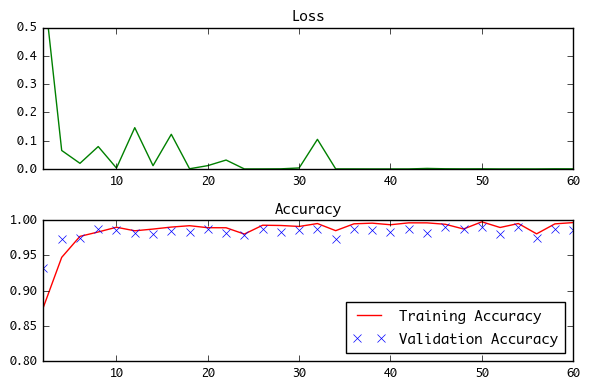

Training Accuracy = 0.995
Validation Accuracy = 0.990


In [18]:
loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(epochs, loss_epoch, 'g')
loss_plot.set_ylim([0.0, 0.5])
loss_plot.set_xlim([epochs[0], epochs[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(epochs, train_acc_epoch, 'r', label='Training Accuracy')
acc_plot.plot(epochs, valid_acc_epoch, 'x', label='Validation Accuracy')
acc_plot.set_ylim([0.8, 1.0])
acc_plot.set_xlim([epochs[0], epochs[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()
print("Training Accuracy = {:.3f}".format(training_accuracy), flush=True)
print("Validation Accuracy = {:.3f}".format(validation_accuracy), flush=True)

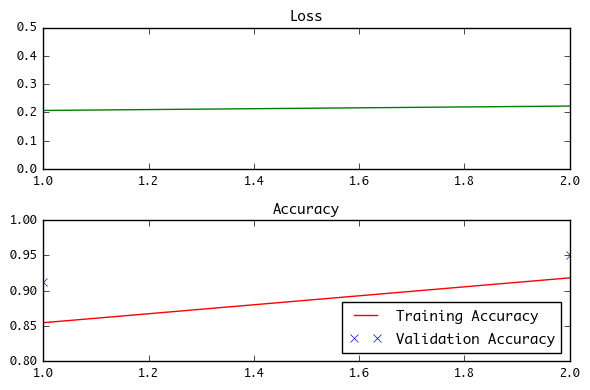

Training Accuracy = 0.918
Validation Accuracy = 0.951


In [57]:
loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(epochs, loss_epoch, 'g')
loss_plot.set_ylim([0.0, 0.5])
loss_plot.set_xlim([epochs[0], epochs[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(epochs, train_acc_epoch, 'r', label='Training Accuracy')
acc_plot.plot(epochs, valid_acc_epoch, 'x', label='Validation Accuracy')
acc_plot.set_ylim([0.8, 1.0])
acc_plot.set_xlim([epochs[0], epochs[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()
print("Training Accuracy = {:.3f}".format(training_accuracy), flush=True)
print("Validation Accuracy = {:.3f}".format(validation_accuracy), flush=True)

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.939


### Before creating additional data

In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.906


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.